<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  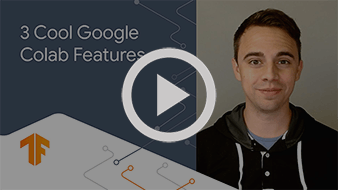
  </a>
</center>

In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 105 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638688 sha256=99cd21f62f30d88b1b256a76db1676275692835a4fbd593c30e013ce5b74ac2d
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [2]:
from fbprophet import Prophet

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [45]:
data=pd.read_csv('covid_19_complete.csv')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [46]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [47]:
data.drop(['Province/State'], axis = 1, inplace = True)

In [48]:
df = data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
df

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010
...,...,...,...,...
2020-07-23,15510481,633506,8710969,6166006
2020-07-24,15791645,639650,8939705,6212290
2020-07-25,16047190,644517,9158743,6243930


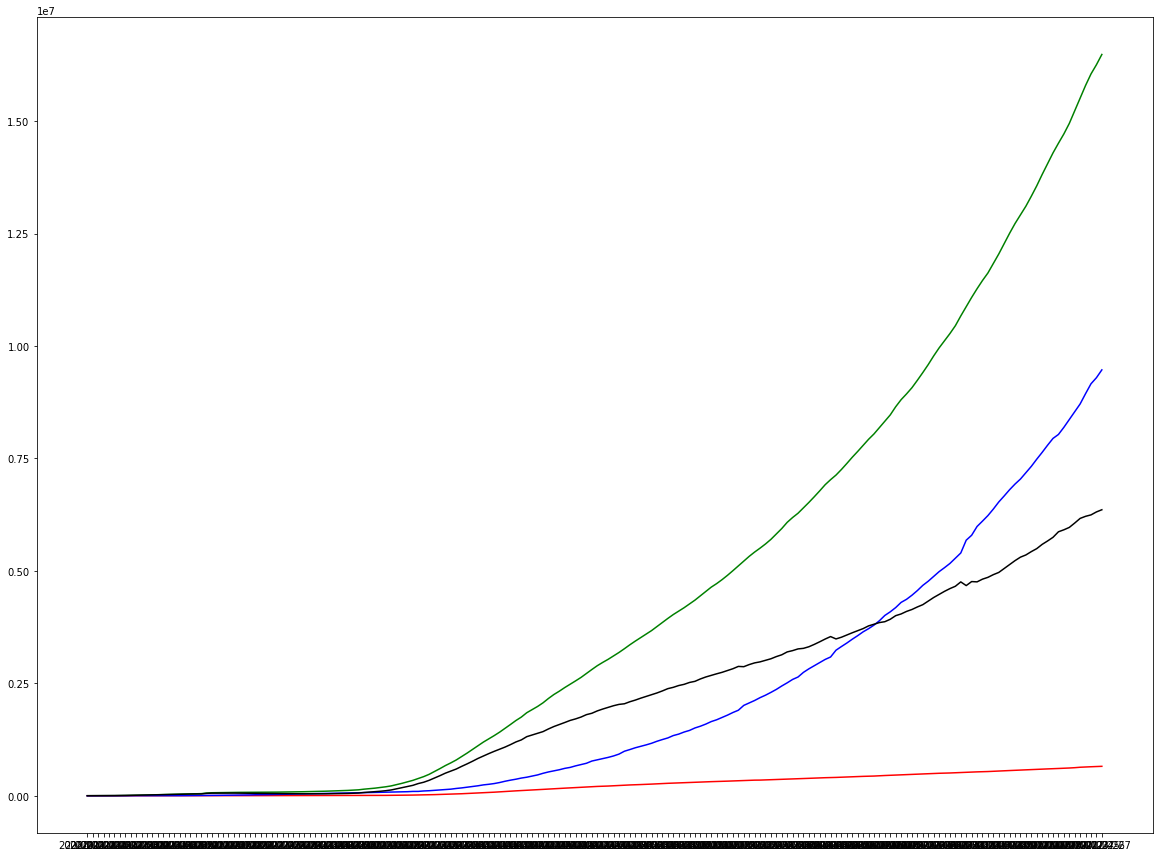

In [49]:
plt.figure(figsize = [20, 15])
plt.plot(df['Confirmed'], color = 'g', label = 'Confirmed')
plt.plot(df['Deaths'], color = 'r', label = 'Deaths')
plt.plot(df['Recovered'], color = 'b', label = 'Recovered')
plt.plot(df['Active'], color = 'k', label = 'Active')
plt.show()

In [50]:
model = Prophet()
model.add_seasonality(name = 'Monthly', period = 30.42, fourier_order = 4)

In [51]:
main = df.reset_index()
confirmed_df = main[['Date', 'Confirmed']]

In [52]:
cols = confirmed_df.columns
confirmed_df = confirmed_df.rename(columns = {cols[0] : 'ds', cols[1] : 'y'})

In [53]:
confirmed_df

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [63]:
div = round((70/100)*confirmed_df.shape[0])
train = confirmed_df.iloc[:div]
test = confirmed_df.iloc[div:]
print(div)
print(train.shape)
print(test.shape)

132
(132, 2)
(56, 2)


In [55]:
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
pred_dates = model.make_future_dataframe(periods = 40)


In [57]:
preds = model.predict(pred_dates) 

In [58]:
preds.yhat.head()

0    2515.624345
1    1724.794137
2    2220.990579
3    1989.494834
4     275.118998
Name: yhat, dtype: float64

In [59]:
preds.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Monthly,Monthly_lower,Monthly_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,51651.006889,-4479.316076,9616.256705,51651.006889,51651.006889,-44097.291858,-44097.291858,-44097.291858,-49135.382544,-49135.382544,-49135.382544,-5038.090686,-5038.090686,-5038.090686,0.0,0.0,0.0,2515.624345
1,2020-01-23,42832.589220,-5459.379585,8716.346749,42832.589220,42832.589220,-40276.150319,-40276.150319,-40276.150319,-41107.795083,-41107.795083,-41107.795083,-831.644764,-831.644764,-831.644764,0.0,0.0,0.0,1724.794137
2,2020-01-24,34014.171551,-5172.363062,9915.152953,34014.171551,34014.171551,-35092.248017,-35092.248017,-35092.248017,-31793.180972,-31793.180972,-31793.180972,3299.067045,3299.067045,3299.067045,0.0,0.0,0.0,2220.990579
3,2020-01-25,25195.753882,-5286.993916,9240.727378,25195.753882,25195.753882,-28123.260315,-28123.260315,-28123.260315,-23206.259048,-23206.259048,-23206.259048,4917.001267,4917.001267,4917.001267,0.0,0.0,0.0,1989.494834
4,2020-01-26,16377.336213,-6795.255231,7473.094667,16377.336213,16377.336213,-19113.308355,-19113.308355,-19113.308355,-16102.217214,-16102.217214,-16102.217214,3011.091140,3011.091140,3011.091140,0.0,0.0,0.0,275.118998


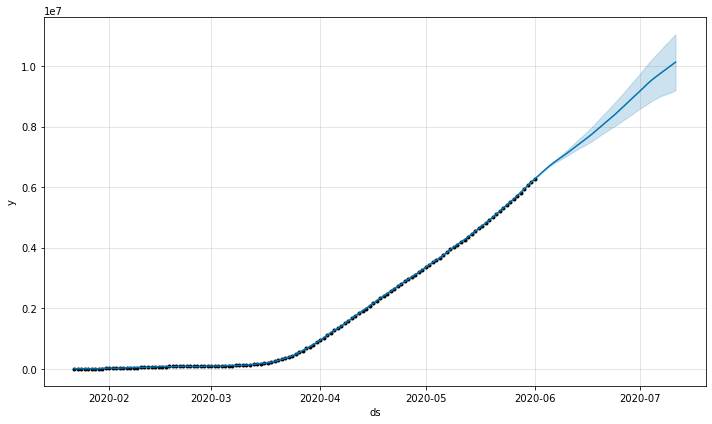

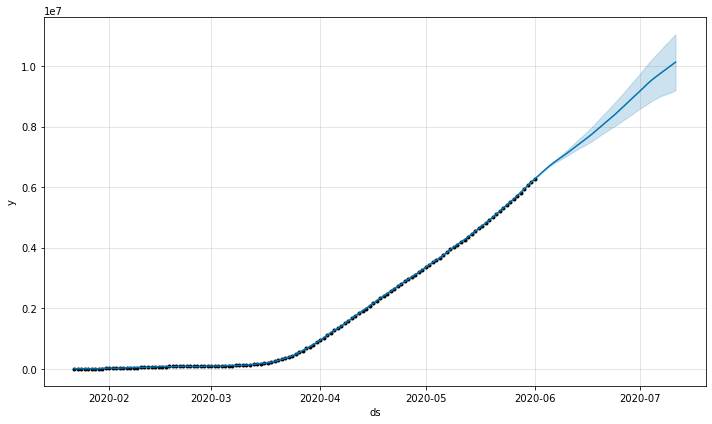

In [60]:
model.plot(preds)

In [66]:
rmse = np.sqrt(mean_squared_error(train['y'], preds['yhat'].iloc[:div]))
print(rmse)

5601.880885750039
